In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from LinearRegression import getData
X, y = getData("Salary_Data.csv")

YearsExperience    False
Salary             False
dtype: bool
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [3]:
print("Input Shape: {}\nOutput Shape: {}".format(X.shape, y.shape))

Input Shape: (30, 1)
Output Shape: (30, 1)


In [4]:
m = X.shape[0] # Number of training examples

#Adding intercept column
X = np.hstack([np.ones((m,1)), X])

In [5]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
print("Training Input Shape: {}\tTraining Output Shape: {}".format(X_tr.shape, y_tr.shape))
print("Testing Input Shape: {}\tTesting Output Shape: {}".format(X_te.shape, y_te.shape))

Training Input Shape: (24, 2)	Training Output Shape: (24, 1)
Testing Input Shape: (6, 2)	Testing Output Shape: (6, 1)


Given Input neither has missing values nor categorical features.


In [7]:
from sklearn.preprocessing import StandardScaler
scl_x = StandardScaler()
scl_y = StandardScaler()

In [8]:
X_tr[:, 1:] = scl_x.fit_transform(X_tr[:, 1:])
X_te[:, 1:] = scl_x.transform(X_te[:, 1:])

In [9]:
print(X_tr)

[[ 1.          1.77445774]
 [ 1.          1.21912622]
 [ 1.         -0.41216011]
 [ 1.         -1.41869849]
 [ 1.         -1.03690807]
 [ 1.         -0.03036969]
 [ 1.         -0.79395053]
 [ 1.         -0.37745189]
 [ 1.         -0.41216011]
 [ 1.          0.94146047]
 [ 1.         -1.34928205]
 [ 1.         -1.27986561]
 [ 1.          1.32325088]
 [ 1.         -1.10632451]
 [ 1.          0.66379471]
 [ 1.          1.49679198]
 [ 1.          0.24729607]
 [ 1.          1.84387418]
 [ 1.          0.55967005]
 [ 1.         -0.68982587]
 [ 1.         -0.44686833]
 [ 1.         -0.23861901]
 [ 1.          0.28200429]
 [ 1.         -0.75924231]]


In [10]:
y_tr = scl_y.fit_transform(y_tr)
y_te = scl_y.transform(y_te)

In [11]:
print(y_te)

[[ 1.38997327]
 [-0.22678133]
 [ 1.43254705]
 [ 0.3212159 ]
 [-0.35312815]
 [-0.61558808]]


In [12]:
print(scl_y.inverse_transform(y_te))

[[112635.]
 [ 67938.]
 [113812.]
 [ 83088.]
 [ 64445.]
 [ 57189.]]


In [13]:
from LinearRegression import LinearRegression as LRscratch
lr = LRscratch(max_iter = 1000)
lr.fit(X_tr, y_tr)

In [14]:
y_pred_scratch = lr.predict(X_te)

In [15]:
from sklearn.linear_model import LinearRegression as LRlib
lr_ = LRlib(n_jobs = -1)
lr_.fit(X_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [16]:
y_pred_lib = lr_.predict(X_te)

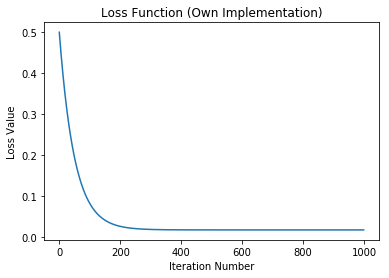

In [17]:
plt.plot(np.arange(lr.max_iter), lr.J)
plt.title("Loss Function (Own Implementation)")
plt.xlabel("Iteration Number")
plt.ylabel("Loss Value")
plt.show()

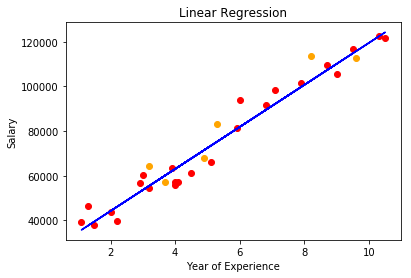

In [18]:
plt.scatter(scl_x.inverse_transform(X_tr[:, 1:]), scl_y.inverse_transform(y_tr), color = "red")
plt.scatter(scl_x.inverse_transform(X_te[:, 1:]), scl_y.inverse_transform(y_te), color = "orange")
plt.plot(scl_x.inverse_transform(X_tr[:, 1:]), scl_y.inverse_transform(lr.predict(X_tr)), color = "blue")
#plt.plot(scl_x.inverse_transform(X_tr[:, 1:]), scl_y.inverse_transform(lr_.predict(X_tr)), color = "green")
'''
    Both regression lines coincides
'''
plt.title("Linear Regression")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.show()